In [1]:
import zipfile
import os

# Ensure the path matches the name of your zip file.
zip_file_name = 'Substation Photos-20231128T192537Z-001.zip'

# This will extract the contents to a folder with the same name as the zip file.
extract_folder_name = zip_file_name.rsplit('.', 1)[0]

# Make sure the extract folder exists.
if not os.path.exists(extract_folder_name):
    os.makedirs(extract_folder_name)

# Now extract the zip file.
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_name)

print(f'Files extracted to {extract_folder_name}/')


Files extracted to Substation Photos-20231128T192537Z-001/


In [2]:
import zipfile
import os
import pandas as pd


zip_file_path = 'C:/Users/srava/Substation Photos-20231128T192537Z-001.zip'
csv_file_path = 'C:/Users/srava/image_labels.csv'

# Directory to extract the ZIP file to, it'll be in the same directory as the ZIP file
extracted_folder = zip_file_path.rsplit('.', 1)[0]

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"Files extracted to {extracted_folder}/")


# Load the CSV file into a DataFrame
labels_df = pd.read_csv(csv_file_path)

# Dictionary to hold the mapping of filenames to labels
image_labels = {}

# Define a function to extract the Object ID from the filename
def extract_id_from_filename(filename):
    parts = filename.split('_')
    if len(parts) > 1 and parts[1].isdigit():
        return int(parts[1].split('.')[0])
    return None

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(extracted_folder):
    for filename in files:
        # Extract the Object ID from the filename, if present
        object_id = extract_id_from_filename(filename)
        
        # Find the label for this Object ID in the DataFrame
        if object_id and object_id in labels_df['Object_ID'].values:
            label = labels_df[labels_df['Object_ID'] == object_id]['Label'].iloc[0]
            image_labels[filename] = label

output_labels_df = pd.DataFrame(list(image_labels.items()), columns=['Filename', 'Label'])
output_labels_df.to_csv('C:/Users/srava/image_labels.csv', index=False)

print("Image labels saved to image_labels.csv")


Files extracted to C:/Users/srava/Substation Photos-20231128T192537Z-001/
Image labels saved to image_labels.csv


In [3]:
for root, dirs, files in os.walk(extracted_folder):
    path = root.split(os.sep)
    print((len(path) - 1) * '---', os.path.basename(root))
    for file in files:
        print(len(path) * '---', file)
        


 Substation Photos-20231128T192537Z-001
--- Substation Photos
------ Test Data
--------- Images
------------ MicrosoftTeams-image (100).png
------------ MicrosoftTeams-image (101).png
------------ MicrosoftTeams-image (102).png
------------ MicrosoftTeams-image (103).png
------------ MicrosoftTeams-image (13).png
------------ MicrosoftTeams-image (14).png
------------ MicrosoftTeams-image (15).png
------------ MicrosoftTeams-image (16).png
------------ MicrosoftTeams-image (17).png
------------ MicrosoftTeams-image (18).png
------------ MicrosoftTeams-image (19).png
------------ MicrosoftTeams-image (20).png
------------ MicrosoftTeams-image (21).png
------------ MicrosoftTeams-image (22).png
------------ MicrosoftTeams-image (23).png
------------ MicrosoftTeams-image (24).png
------------ MicrosoftTeams-image (25).png
------------ MicrosoftTeams-image (26).png
------------ MicrosoftTeams-image (27).png
------------ MicrosoftTeams-image (28).png
------------ MicrosoftTeams-image (29).p

In [4]:
pip install lxml pandas


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os

# This will print the current working directory
print(os.getcwd())

# This will list all files in the current working directory
print(os.listdir())


C:\Users\srava
['.anaconda', '.cache', '.cisco', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.redhat', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'Images-20231112T043832Z-001', 'Images-20231112T043832Z-001.zip', 'Images-20231120T182235Z-001', 'Images-20231120T182235Z-001.zip', 'Images-20231127T191735Z-001', 'Images-20231127T191735Z-001.zip', 'image_labels.csv', 'image_labels_modified.csv', 'Labelling and preprocessing.ipynb', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'Pro

In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Subststions_ExportTable4.csv')

# Display the first few rows of the DataFrame
df.head()  # This will display the first 5 rows of the DataFrame


,OID_,Object_ID,Name,State,County,City,Zip,Region,Latitude,Longitude,Collected_By,Validated_By,Comments,ELEVATION,FIRM_100YR,FIRM_500YR,SURFACE_SOURCE,FRM_FLD_SOURCE
0,1,1,UNKNOWN116758,SC,ABBEVILLE,CALHOUN FALLS,29628,SRW,34.087654,-82.588782,MC,IK,NaN,158.030169,NaN,NaN,SC_SavannahPeeDee_2019_B19,NFHL_405047C
1,2,2,UNKNOWN170020,SC,ABBEVILLE,CALHOUN FALLS,29628,SRW,34.120376,-82.565421,MC,IK,NaN,160.270118,NaN,NaN,SC_SavannahPeeDee_2019_B19,NFHL_405047C
2,3,3,UNKNOWN116950,SC,ABBEVILLE,ABBEVILLE,29620,SRW,34.130991,-82.420963,MC,IK,NaN,189.146120,NaN,NaN,SC_SavannahPeeDee_2019_B19,NFHL_405047C
3,4,4,UNKNOWN116759,SC,ABBEVILLE,CALHOUN FALLS,29628,SRW,34.138253,-82.613594,MC,IK,NaN,171.599608,NaN,NaN,SC_SavannahPeeDee_2019_B19,NFHL_405047C
4,5,5,UNKNOWN116954,SC,ABBEVILLE,ABBEVILLE,29620,SRW,34.163600,-82.415081,MC,IK,NaN,193.462692,NaN,NaN,SC_SavannahPeeDee_2019_B19,NFHL_405047C


In [7]:
import os

# Define the directory path
directory_path = 'C:/Users/srava/Substation Photos-20231128T192537Z-001'

# Get a list of subfolders within the directory
subfolders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

# Print the list of subfolders
for subfolder in subfolders:
    print(subfolder)


Substation Photos


In [8]:
import os

# Path to the "Substation" folder
substation_folder = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos'

# List the contents of the folder
contents = os.listdir(substation_folder)

# Print the contents
print("Contents of the 'Substation' folder:")
for item in contents:
    print(item)


Contents of the 'Substation' folder:
Test Data
Training Data


In [9]:
import os

# Path to the "Substation" folder
substation_folder = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data'

# List the contents of the folder
contents = os.listdir(substation_folder)

# Print the contents
print("Contents of the 'Substation' folder:")
for item in contents:
    print(item)


Contents of the 'Substation' folder:
Images
Labels


In [10]:
import os

# Path to the "Substation" folder
substation_folder = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'

# List the contents of the folder
contents = os.listdir(substation_folder)

# Print the contents
print("Contents of the 'Substation' folder:")
for item in contents:
    print(item)


Contents of the 'Substation' folder:
1.png
10.png
100.png
101.PNG
102.PNG
103.PNG
104.PNG
105.PNG
106.PNG
107.PNG
108.PNG
109.PNG
11.png
110.PNG
111.PNG
112.PNG
113.PNG
114.PNG
115.PNG
116.PNG
117.PNG
118.PNG
119.PNG
12.png
120.PNG
121.PNG
122.PNG
123.PNG
124.PNG
125.PNG
126.PNG
127.PNG
128.PNG
129.PNG
13.png
130.PNG
131.PNG
132.PNG
133.PNG
134.PNG
135.PNG
136.PNG
137.PNG
138.PNG
139.PNG
14.png
140.PNG
141.PNG
142.PNG
143.PNG
144.PNG
145.PNG
146.PNG
147.PNG
148.PNG
149.PNG
15.png
150.PNG
151.PNG
152.PNG
153.PNG
154.PNG
155.PNG
156.PNG
157.PNG
158.PNG
159.PNG
16.png
160.PNG
161.PNG
162.PNG
163.PNG
164.PNG
165.PNG
166.PNG
167.PNG
168.PNG
169.PNG
17.png
170.PNG
171.PNG
172.PNG
173.PNG
174.PNG
175.PNG
176.PNG
177.PNG
178.PNG
179.PNG
18.png
180.PNG
181.PNG
183.PNG
184.PNG
185.PNG
186.PNG
187.PNG
188.PNG
189.PNG
19.png
190.PNG
191.PNG
192.PNG
193.PNG
194.PNG
195.PNG
196.PNG
197.PNG
198.PNG
199.PNG
2.png
20.png
200.PNG
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
3.png
30.pn

In [11]:
import os
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Subststions_ExportTable4.csv')

# Directory where the images are stored
image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'


# Dictionary to hold the mapping of filenames to labels
image_labels = {}

# Loop through each image in the directory
for filename in os.listdir(image_dir):
    # Extract the number from the filename
    if filename.startswith('Substation'):
        object_id = int(filename.split(' ')[1].split('.')[0])
    else:
        continue  

    # Find the row in the DataFrame that corresponds to this Object_ID
    row = df[df['Object_ID'] == object_id]
    
    # If a matching row is found, add the filename and label to the dictionary
    if not row.empty:
        label = f"{row['Name'].values[0]}_{row['City'].values[0]}"
        image_labels[filename] = label

labels_df = pd.DataFrame(list(image_labels.items()), columns=['Filename', 'Label'])
labels_df.to_csv('image_labels.csv', index=False)


In [12]:


# Loop through each image in the directory
for filename in os.listdir(image_dir):
    print(f"Processing file: {filename}")  # This will show you each file being processed
    # Extract the number from the filename
    if filename.startswith('Substation'):
        object_id = int(filename.split(' ')[1].split('.')[0])
        print(f"Found Substation file with ID: {object_id}")  # This will confirm when a Substation file is found
        
        
        if not row.empty:
            label = f"{row['Name'].values[0]}_{row['City'].values[0]}"
            image_labels[filename] = label
            print(f"Labeled file: {filename} with label: {label}")  # This will confirm when a label is assigned
        else:
            print(f"No match found in CSV for file: {filename}")
    else:
        print(f"Skipping file: {filename}")  # This will confirm when a file is skipped



Processing file: 1.png
Skipping file: 1.png
Processing file: 10.png
Skipping file: 10.png
Processing file: 100.png
Skipping file: 100.png
Processing file: 101.PNG
Skipping file: 101.PNG
Processing file: 102.PNG
Skipping file: 102.PNG
Processing file: 103.PNG
Skipping file: 103.PNG
Processing file: 104.PNG
Skipping file: 104.PNG
Processing file: 105.PNG
Skipping file: 105.PNG
Processing file: 106.PNG
Skipping file: 106.PNG
Processing file: 107.PNG
Skipping file: 107.PNG
Processing file: 108.PNG
Skipping file: 108.PNG
Processing file: 109.PNG
Skipping file: 109.PNG
Processing file: 11.png
Skipping file: 11.png
Processing file: 110.PNG
Skipping file: 110.PNG
Processing file: 111.PNG
Skipping file: 111.PNG
Processing file: 112.PNG
Skipping file: 112.PNG
Processing file: 113.PNG
Skipping file: 113.PNG
Processing file: 114.PNG
Skipping file: 114.PNG
Processing file: 115.PNG
Skipping file: 115.PNG
Processing file: 116.PNG
Skipping file: 116.PNG
Processing file: 117.PNG
Skipping file: 117.PNG


In [13]:
import os
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Subststions_ExportTable4.csv')

image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'



# Dictionary to hold the mapping of filenames to labels
image_labels = {}

# Helper function to extract object ID from filename
def extract_object_id(filename):
    if filename.startswith('Substation'):
        return int(filename.split(' ')[1].split('.')[0])
    elif filename.split('.')[0].isdigit():
        return int(filename.split('.')[0])
    else:
        return None

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(image_dir):
    for filename in files:
        # Extract the Object ID from the filename
        object_id = extract_object_id(filename)
        if object_id is not None:
            # Find the row in the DataFrame that corresponds to this Object_ID
            row = df[df['Object_ID'] == object_id]
            # If a matching row is found, add the filename and label to the dictionary
            if not row.empty:
                label = f"{row['Name'].values[0]}_{row['City'].values[0]}"
                image_labels[filename] = label
                print(f"Labeled file: {filename} with label: {label}")
            else:
                print(f"No match found in CSV for file: {filename}")
        else:
            print(f"Skipping file: {filename}")

labels_df = pd.DataFrame(list(image_labels.items()), columns=['Filename', 'Label'])
labels_df.to_csv('image_labels.csv', index=False)


Labeled file: 1.png with label: UNKNOWN116758_CALHOUN FALLS
Labeled file: 10.png with label: UNKNOWN162058_ABBEVILLE
Labeled file: 100.png with label: UNKNOWN151726_ULMER
Labeled file: 101.PNG with label: UNKNOWN120910_MARTIN
Labeled file: 102.PNG with label: UNKNOWN170046_ULMER
Labeled file: 103.PNG with label: UNKNOWN120912_MARTIN
Labeled file: 104.PNG with label: UNKNOWN162066_IVA
Labeled file: 105.PNG with label: UNKNOWN116966_IVA
Labeled file: 106.PNG with label: UNKNOWN116969_IVA
Labeled file: 107.PNG with label: UNKNOWN116968_IVA
Labeled file: 108.PNG with label: JOHN S RAINEY_IVA
Labeled file: 109.PNG with label: UNKNOWN116971_STARR
Labeled file: 11.png with label: UNKNOWN152739_ABBEVILLE
Labeled file: 110.PNG with label: UNKNOWN116727_STARR
Labeled file: 111.PNG with label: UNKNOWN151397_ANDERSON
Labeled file: 112.PNG with label: UNKNOWN116726_ANDERSON
Labeled file: 113.PNG with label: UNKNOWN151387_STARR
Labeled file: 114.PNG with label: ANDERSON_STARR
Labeled file: 115.PNG w

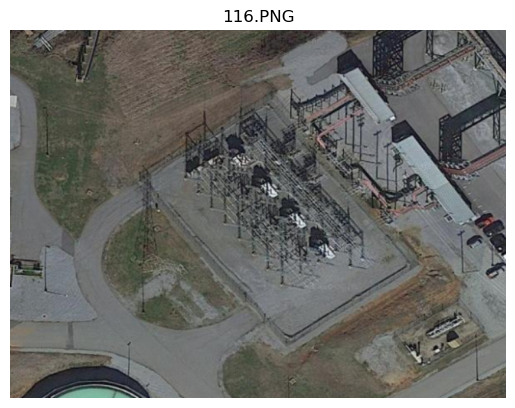

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Correct path to the directory where the images are stored
image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'

# Load the DataFrame with image labels
df = pd.read_csv('image_labels.csv')

# Function to display an image for a given county
def display_image_for_county(county_name):
    # Filter the DataFrame for the given county
    filtered_df = df[df['Label'].str.contains(county_name, case=False, na=False)]

    # Check if there are any images for the given county
    if filtered_df.empty:
        print(f"No images found for county: {county_name}")
        return

    # Randomly select one image
    selected_image = random.choice(filtered_df['Filename'].tolist())

    # Construct the full path to the image
    image_path = os.path.join(image_dir, selected_image)

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        print("Current working directory:", os.getcwd())
        print("Files in the directory:", os.listdir(image_dir))
        return

    # Load and display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(selected_image)
    plt.axis('off')
    plt.show()

# Example usage
county_name = 'ANDERSON'  # Replace with the county name you want to check
display_image_for_county(county_name)


In [15]:
# Load the DataFrame with image labels 
labels_df = pd.read_csv('image_labels.csv')

# Define the filename you want to check
filename_to_check = '134.PNG'

# Look up the label for the given filename
label_row = labels_df[labels_df['Filename'].str.contains(filename_to_check, case=False)]

# Check if the filename was found and print out the label
if not label_row.empty:
    label = label_row['Label'].iloc[0]
    print(f"The image {filename_to_check} is labeled as: {label}")
else:
    print(f"No label found for image {filename_to_check}")


The image 134.PNG is labeled as: UNKNOWN151394_ANDERSON


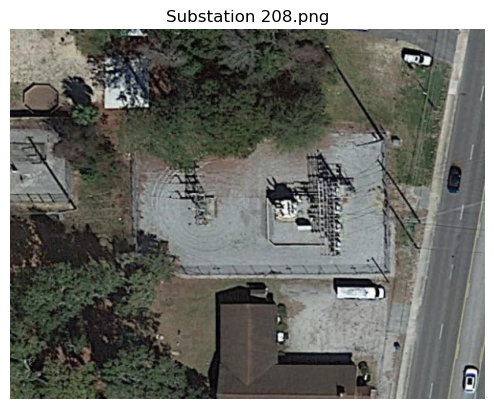

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Correct path to the directory where the images are stored
image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'

# Load the DataFrame with image labels
df = pd.read_csv('image_labels.csv')

# Function to display an image for a given county
def display_image_for_county(county_name):
    # Filter the DataFrame for the given county
    filtered_df = df[df['Label'].str.contains(county_name, case=False, na=False)]

    # Check if there are any images for the given county
    if filtered_df.empty:
        print(f"No images found for county: {county_name}")
        return

    # Randomly select one image
    selected_image = random.choice(filtered_df['Filename'].tolist())

    # Construct the full path to the image
    image_path = os.path.join(image_dir, selected_image)

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        print("Current working directory:", os.getcwd())
        print("Files in the directory:", os.listdir(image_dir))
        return

    # Load and display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(selected_image)
    plt.axis('off')
    plt.show()

# Example usage
county_name = 'PORT ROYAL'  # Replace with the county name you want to check
display_image_for_county(county_name)


In [17]:
# Load the DataFrame with image labels (make sure the path is correct)
labels_df = pd.read_csv('image_labels.csv')

# Define the filename you want to check
filename_to_check = ' 207.png'

# Look up the label for the given filename
label_row = labels_df[labels_df['Filename'].str.contains(filename_to_check, case=False)]

# Check if the filename was found and print out the label
if not label_row.empty:
    label = label_row['Label'].iloc[0]
    print(f"The image {filename_to_check} is labeled as: {label}")
else:
    print(f"No label found for image {filename_to_check}")

The image  207.png is labeled as: UNKNOWN162028_PORT ROYAL


In [18]:
import pandas as pd

# Load the DataFrame with image labels
labels_df = pd.read_csv('C:/Users/srava/image_labels.csv')

# Append 'Substation' to the end of each label
labels_df['Label'] = labels_df['Label'].apply(lambda x: x + "_Substation")

# Save the modified labels back to a new CSV file
labels_df.to_csv('C:/Users/srava/image_labels_modified.csv', index=False)

print("Modified labels saved to image_labels_modified.csv")


Modified labels saved to image_labels_modified.csv


In [19]:
import pandas as pd

# Load the modified DataFrame with image labels
modified_labels_df = pd.read_csv('C:/Users/srava/image_labels_modified.csv')

# Print the first few modified labels to verify
print("First few modified labels:")
print(modified_labels_df.head())

# Optionally, check each label to ensure it ends with '_Substation'
for index, row in modified_labels_df.iterrows():
    if not row['Label'].endswith('_Substation'):
        print(f"Label error in file: {row['Filename']} - Label: {row['Label']}")


First few modified labels:
  Filename                                   Label
0    1.png  UNKNOWN116758_CALHOUN FALLS_Substation
1   10.png      UNKNOWN162058_ABBEVILLE_Substation
2  100.png          UNKNOWN151726_ULMER_Substation
3  101.PNG         UNKNOWN120910_MARTIN_Substation
4  102.PNG          UNKNOWN170046_ULMER_Substation


In [20]:
import pandas as pd

# Load the modified DataFrame with image labels
modified_labels_df = pd.read_csv('C:/Users/srava/image_labels_modified.csv')

# Check if all labels end with '_Substation'
all_labeled_correctly = True
for index, row in modified_labels_df.iterrows():
    if not row['Label'].endswith('_Substation'):
        print(f"Label error in file: {row['Filename']} - Label: {row['Label']}")
        all_labeled_correctly = False

if all_labeled_correctly:
    print("All labels are correctly modified with '_Substation'.")
else:
    print("Some labels are not correctly modified.")


All labels are correctly modified with '_Substation'.


In [21]:
# Print all labels
for label in modified_labels_df['Label']:
    print(label)


UNKNOWN116758_CALHOUN FALLS_Substation
UNKNOWN162058_ABBEVILLE_Substation
UNKNOWN151726_ULMER_Substation
UNKNOWN120910_MARTIN_Substation
UNKNOWN170046_ULMER_Substation
UNKNOWN120912_MARTIN_Substation
UNKNOWN162066_IVA_Substation
UNKNOWN116966_IVA_Substation
UNKNOWN116969_IVA_Substation
UNKNOWN116968_IVA_Substation
JOHN S RAINEY_IVA_Substation
UNKNOWN116971_STARR_Substation
UNKNOWN152739_ABBEVILLE_Substation
UNKNOWN116727_STARR_Substation
UNKNOWN151397_ANDERSON_Substation
UNKNOWN116726_ANDERSON_Substation
UNKNOWN151387_STARR_Substation
ANDERSON_STARR_Substation
UNKNOWN175194_ANDERSON_Substation
UNKNOWN113975_ANDERSON_Substation
UNKNOWN176612_ANDERSON_Substation
UNKNOWN170050_ANDERSON_Substation
UNKNOWN113976_ANDERSON_Substation
UNKNOWN116956_ABBEVILLE_Substation
UNKNOWN151398_ANDERSON_Substation
UNKNOWN175209_HONEA PATH_Substation
UNKNOWN175192_ANDERSON_Substation
UNKNOWN175197_ANDERSON_Substation
UNKNOWN175193_ANDERSON_Substation
UNKNOWN113977_ANDERSON_Substation
UNKNOWN113390_ANDERSON

In [22]:
# Specify the complete file path including the filename
file_path = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Labels/substation_labels_list.txt'

# Save all labels to a text file
with open(file_path, 'w') as file:
    for label in modified_labels_df['Label']:
        file.write(label + '\n')

print("Labels saved to substation_labels_list.txt")


Labels saved to substation_labels_list.txt


In [23]:
# Print the first few labels
print("First few labels:")
print(modified_labels_df['Label'].head())


First few labels:
0    UNKNOWN116758_CALHOUN FALLS_Substation
1        UNKNOWN162058_ABBEVILLE_Substation
2            UNKNOWN151726_ULMER_Substation
3           UNKNOWN120910_MARTIN_Substation
4            UNKNOWN170046_ULMER_Substation
Name: Label, dtype: object


In [24]:
import os

# Path to the "Substation" folder
substation_folder = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Labels'

# List the contents of the folder
contents = os.listdir(substation_folder)

# Print the contents
print("Contents of the 'Substation' folder:")
for item in contents:
    print(item)


Contents of the 'Substation' folder:
substation_labels_list.txt


In [25]:
print("Starting script...")

image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'

print(f"Checking for directory: {image_dir}")

if not os.path.exists(image_dir):
    os.makedirs(image_dir)
    print(f"Created directory: {image_dir}")
else:
    print(f"Directory exists: {image_dir}")

print("Script completed.")


Starting script...
Checking for directory: Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images
Directory exists: Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images
Script completed.


In [26]:
from PIL import Image
import os
import numpy as np

# Path to original image directory
image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'

# Ensure the processed directory exists within the training data folder
processed_dir = os.path.join(image_dir, 'ProcessedImages')

# Ensure the processed directory exists
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Define the target size for all images
target_size = (224, 224)  # For example, 224x224. Adjust as needed.

# Iterate through each image in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_dir, filename)
        with Image.open(image_path) as img:
            # Resize the image
            img = img.resize(target_size)

            # Normalize pixel values to be between 0 and 1
            img_array = np.array(img) / 255.0

            # Save the processed image in the training data folder
            processed_path = os.path.join(processed_dir, filename)
            img = Image.fromarray((img_array * 255).astype('uint8'))
            img.save(processed_path)

print("Image preprocessing completed.")


Image preprocessing completed.


In [27]:
# Print the path to the directory where processed images are saved
print("Processed images are saved in:", processed_dir)


Processed images are saved in: Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages


In [28]:
import os

# Path to the "Substation" folder
substation_folder = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages'

# List the contents of the folder
contents = os.listdir(substation_folder)

# Print the contents
print("Contents of the 'Substation' folder:")
for item in contents:
    print(item)


Contents of the 'Substation' folder:
1.png
10.png
100.png
101.PNG
102.PNG
103.PNG
104.PNG
105.PNG
106.PNG
107.PNG
108.PNG
109.PNG
11.png
110.PNG
111.PNG
112.PNG
113.PNG
114.PNG
115.PNG
116.PNG
117.PNG
118.PNG
119.PNG
12.png
120.PNG
121.PNG
122.PNG
123.PNG
124.PNG
125.PNG
126.PNG
127.PNG
128.PNG
129.PNG
13.png
130.PNG
131.PNG
132.PNG
133.PNG
134.PNG
135.PNG
136.PNG
137.PNG
138.PNG
139.PNG
14.png
140.PNG
141.PNG
142.PNG
143.PNG
144.PNG
145.PNG
146.PNG
147.PNG
148.PNG
149.PNG
15.png
150.PNG
151.PNG
152.PNG
153.PNG
154.PNG
155.PNG
156.PNG
157.PNG
158.PNG
159.PNG
16.png
160.PNG
161.PNG
162.PNG
163.PNG
164.PNG
165.PNG
166.PNG
167.PNG
168.PNG
169.PNG
17.png
170.PNG
171.PNG
172.PNG
173.PNG
174.PNG
175.PNG
176.PNG
177.PNG
178.PNG
179.PNG
18.png
180.PNG
181.PNG
183.PNG
184.PNG
185.PNG
186.PNG
187.PNG
188.PNG
189.PNG
19.png
190.PNG
191.PNG
192.PNG
193.PNG
194.PNG
195.PNG
196.PNG
197.PNG
198.PNG
199.PNG
2.png
20.png
200.PNG
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
3.png
30.pn

In [29]:
from PIL import Image
import os
import numpy as np

# Path to original image directory
image_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images'

# Path to save processed images
processed_dir = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages'

# Ensure the processed directory exists
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Define the target size for all images
target_size = (224, 224)  # For example, 224x224. Adjust as needed.

# Iterate through each image in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_dir, filename)
        with Image.open(image_path) as img:
            # Resize the image
            img = img.resize(target_size)

            # Normalize pixel values to be between 0 and 1
            img_array = np.array(img) / 255.0

            # Save the processed image
            processed_path = os.path.join(processed_dir, filename)
            img = Image.fromarray((img_array * 255).astype('uint8'))
            img.save(processed_path)

print("Image preprocessing completed.")


Image preprocessing completed.


In [30]:
from PIL import Image
import os

# Path to the processed images directory
processed_dir = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages'

# Initialize a set to hold image sizes
image_sizes = set()

# Iterate through each image in the directory
for filename in os.listdir(processed_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(processed_dir, filename)
        with Image.open(image_path) as img:
            # Add image size to the set
            image_sizes.add(img.size)

# Check if all images are of the same size
if len(image_sizes) == 1:
    print(f"All images are of the same size: {image_sizes.pop()}")
else:
    print("Images are of varying sizes:")
    for size in image_sizes:
        print(size)


All images are of the same size: (224, 224)


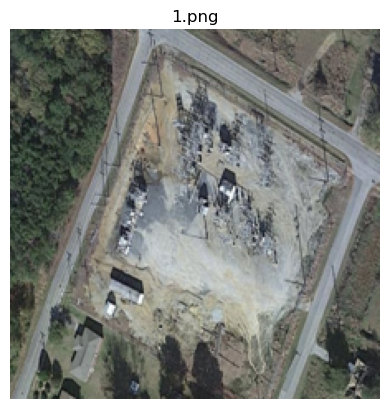

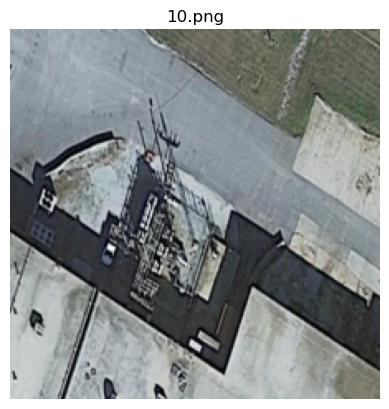

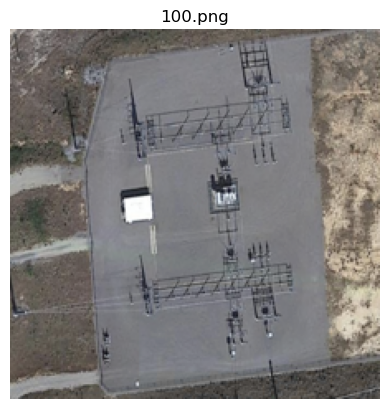

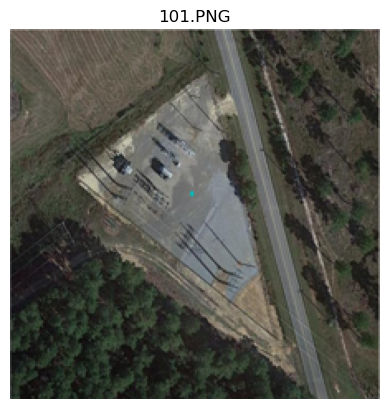

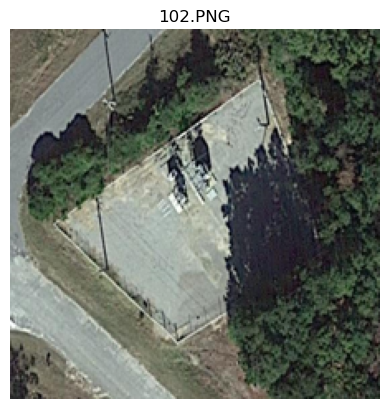

In [31]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to the processed images directory
processed_dir = 'C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages'

# Number of images to display
num_images_to_display = 5

# Counter to keep track of how many images have been displayed
displayed_images = 0

# Iterate through each image in the directory
for filename in os.listdir(processed_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and displayed_images < num_images_to_display:
        image_path = os.path.join(processed_dir, filename)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
        plt.show()

        displayed_images += 1


In [32]:
!pip install tensorflow


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

number_of_classes = 1  # Replace X with the actual number of classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(number_of_classes, activation='softmax')
])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

In [34]:
import os

for dirname, _, filenames in os.walk('C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\1.png
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\10.png
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\100.png
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\101.PNG
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\102.PNG
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\103.PNG
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\104.PNG
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images\ProcessedImages\105.PNG
C:/Users/srava/Substation Photos-20231128T192537Z-001/Substation Ph

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Set the paths to the data
data_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images/ProcessedImages'
label_file = 'image_labels_modified.csv'

# Load the labels from the CSV file
labels_df = pd.read_csv(label_file)

# Create a data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    validation_split=0.2,   # Split data into 80% training and 20% validation
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift image width by up to 20%
    height_shift_range=0.2, # Randomly shift image height by up to 20%
    horizontal_flip=True    # Randomly flip images horizontally
)

# Load and preprocess images using the data generator
image_size = (224, 224)
batch_size = 32

train_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=data_dir,
    x_col="Filename",
    y_col="Label",
    subset="training",
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=image_size
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=data_dir,
    x_col="Filename",
    y_col="Label",
    subset="validation",
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=image_size
)

# Create a pre-trained model (VGG16) with custom output layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    verbose=1
)

# Evaluate the model on the testing set (unseen data)
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Found 240 validated image filenames belonging to 299 classes.
Found 59 validated image filenames belonging to 299 classes.
58889256/58889256 [==============================] - 2s 0us/step


NameError: name 'NUM_CLASSES' is not defined

In [37]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Set the paths to the data
data_dir = 'Substation Photos-20231128T192537Z-001/Substation Photos/Training Data/Images/ProcessedImages'
label_file = 'image_labels_modified.csv'

# Load the labels from the CSV file
labels_df = pd.read_csv(label_file)

# Create a data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    validation_split=0.2,   # Split data into 80% training and 20% validation
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift image width by up to 20%
    height_shift_range=0.2, # Randomly shift image height by up to 20%
    horizontal_flip=True    # Randomly flip images horizontally
)

# Load and preprocess images using the data generator
image_size = (224, 224)
batch_size = 32

train_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=data_dir,
    x_col="Filename",
    y_col="Label",
    subset="training",
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=image_size
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=data_dir,
    x_col="Filename",
    y_col="Label",
    subset="validation",
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=image_size
)

# Create a pre-trained model (VGG16) with custom output layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
NUM_CLASSES = len(labels_df['Label'].unique())  # Get the number of unique classes from your data
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    verbose=1
)

# Evaluate the model on the testing set (unseen data)
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Found 240 validated image filenames belonging to 299 classes.
Found 59 validated image filenames belonging to 299 classes.
Epoch 1/10


8/8 [==============================] - 337s 41s/step - loss: 5.7952 - accuracy: 0.0000e+00 - val_loss: 5.7087 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 337s 42s/step - loss: 5.7138 - accuracy: 0.0000e+00 - val_loss: 5.7159 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 339s 45s/step - loss: 5.6974 - accuracy: 0.0125 - val_loss: 5.7222 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 605s 81s/step - loss: 5.7078 - accuracy: 0.0000e+00 - val_loss: 5.7053 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 336s 42s/step - loss: 5.6978 - accuracy: 0.0000e+00 - val_loss: 5.7135 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 327s 41s/step - loss: 5.7006 - accuracy: 0.0042 - val_loss: 5.7220 - val_accuracy: 0.0000